<a href="https://colab.research.google.com/github/sanagahoi/Data-science-Project-1/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FRAUD DETECTION :

Build a model to detect fraudulent transactions or
activities by identifying anomalies in financial or
behavioral data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install kaggle

In [3]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [4]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 91% 60.0M/66.0M [00:00<00:00, 208MB/s]
100% 66.0M/66.0M [00:00<00:00, 205MB/s]


In [5]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score

In [6]:
df = pd.read_csv('creditcardfraud.zip', compression='zip')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Explore the features available in your dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# Checking the null values in the dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no null value present in the dataset

In [10]:
# Check the duplicate values
duplicates = df.duplicated().sum()
duplicates

1081

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(283726, 31)

In [13]:
# Count the occurrences of legitimate and fraud cases
occ = df['Class'].value_counts()
print('Total number of legitimate cases and fraud cases \n', occ)
print('-'*50)

# Print the ratio of legitimate cases to fraud cases
print('percentage of legitimate cases and fraud cases \n', occ / len(df))

Total number of legitimate cases and fraud cases 
 0    283253
1       473
Name: Class, dtype: int64
--------------------------------------------------
percentage of legitimate cases and fraud cases 
 0    0.998333
1    0.001667
Name: Class, dtype: float64


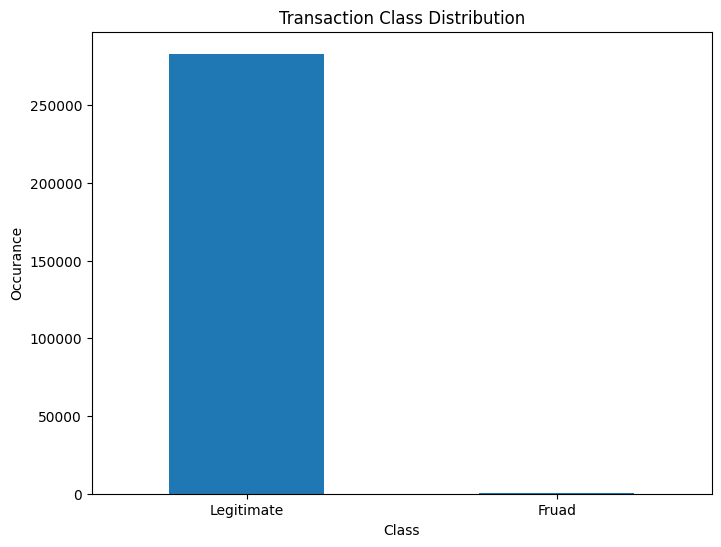

In [14]:
fig = plt.figure(figsize=(8,6))
occ.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.xticks(range(2), labels=['Legitimate', 'Fruad'])
plt.ylabel("Occurance")
plt.show()

- From the above distribution, it's clear that dataset is imbalance

In [15]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


- Dividing the dataset based on legit and fraud cases

In [16]:
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]
print("Legitimate data --> ", legit.shape , "\n Fraud data --> ", fraud.shape)

Legitimate data -->  (283253, 31) 
 Fraud data -->  (473, 31)


- Now we reduce imbalancy between data

2. Undersampling method - Minimizing the number of data of the legitimate cases. It will shorten the data which is not a good practice in such serious cases

In [17]:
# Reducing the dataset upto 492 to make equal contribution of both classes
legit_sample = legit.sample(n=473)

In [18]:
# create new dataset by concatenate the legit_sample and fraud values
new_df = pd.concat([legit_sample, fraud], axis=0)

Checking the mean values again to catch the difference in datasets

In [19]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91207.877378,-0.109993,-0.118316,0.105969,0.194583,0.083579,0.012925,0.021021,-0.056627,0.048624,...,0.018636,-0.008458,-0.034610,0.006258,-0.006596,0.028799,0.026213,0.009760,0.00346,99.874545
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.07827,123.871860


this mean difference from the original dataset varies each time when we take sample of it

- Splitting the dataset into features i.e. X and target i.e. y

In [20]:
X = new_df.drop(columns=['Class'], axis=1)
y = new_df['Class']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y,random_state=2)

print('Shapes --> \n X_train --> ', X_train.shape, '\n X_test --> ', X_test.shape, '\n y_train --> ', y_train.shape , "\n y_test --> ", y_test.shape)

Shapes --> 
 X_train -->  (662, 30) 
 X_test -->  (284, 30) 
 y_train -->  (662,) 
 y_test -->  (284,)


Fit transform the model

In [22]:
print( "Logistic Regression")
model = LogisticRegression()
# Fit the model
model.fit(X_train, y_train)

# prediction
training_prediction = model.predict(X_train)

# The accuracy of trained set
print("Accuracy of trained data --> " , accuracy_score( training_prediction, y_train))

# The accuracy of test set
predicted_y_test = model.predict(X_test)
print("Accuracy of test data --> " , accuracy_score( predicted_y_test, y_test ))

Logistic Regression
Accuracy of trained data -->  0.947129909365559
Accuracy of test data -->  0.9190140845070423


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy score on training and test data doesn't differ much hence it's good to go but let's try SMOTE method for resampling

3. Using SMOTE- synthetic minority oversampling technique - It uses the nearest neighbours technique to create the synthetic fraud cases.

In [23]:
# This is the pipeline module we need for this from imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE()
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [24]:
X = df.drop(columns=['Class'], axis = 1)
y = df['Class']

# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data
pipeline.fit(X_train, y_train)
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix
print('Classifcation report:\n', classification_report(y_test, predicted))

conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

print('Accuracy', accuracy_score(predicted, y_test))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     70829
           1       0.06      0.85      0.12       103

    accuracy                           0.98     70932
   macro avg       0.53      0.92      0.55     70932
weighted avg       1.00      0.98      0.99     70932

Confusion matrix:
 [[69499  1330]
 [   15    88]]
Accuracy 0.9810381774093498


Hence resampling with smote is giving better results.